# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Общая информация о данных

In [1]:
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t')

In [2]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

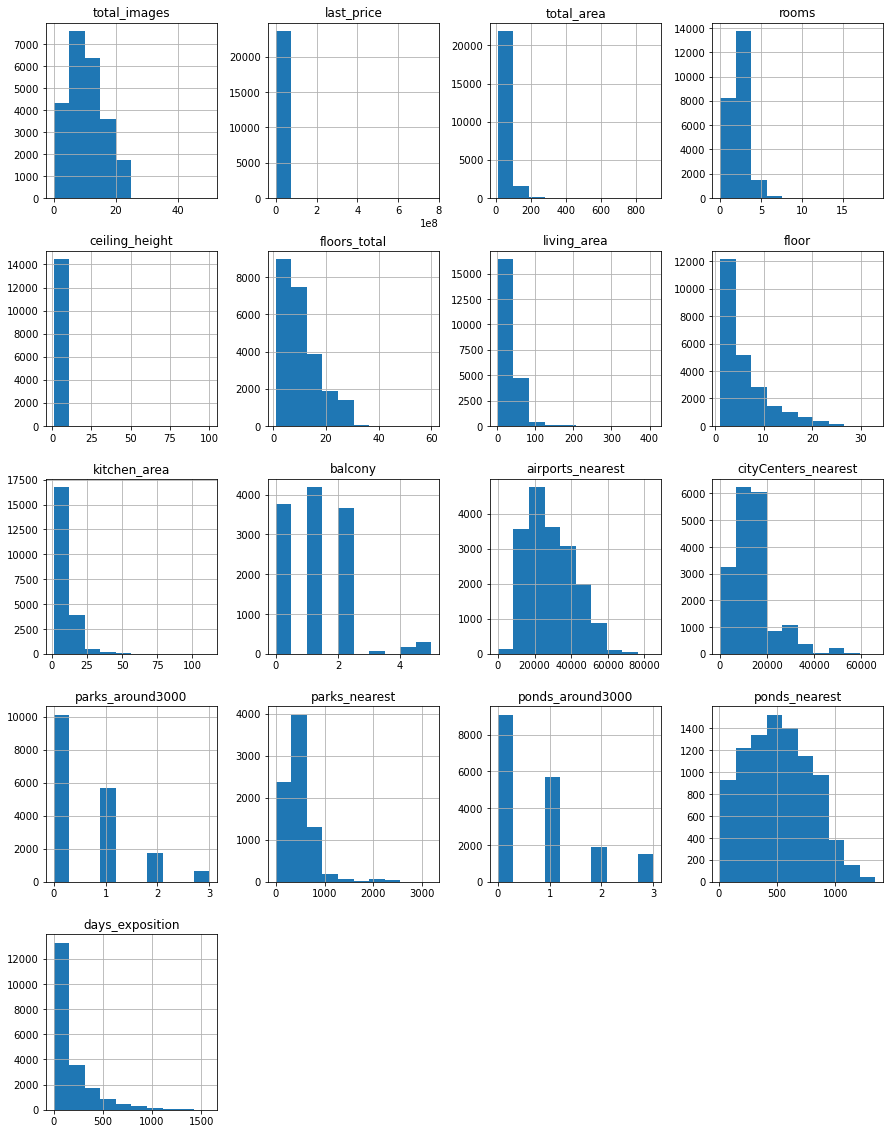

In [5]:
df.hist(figsize=(15, 20))

<div class="alert alert-info">
Данные представляют собой информацию о 23699 объектах недвижимости в Санкт-Петербурге  пригородах. Есть информация по 22 параметрам.
 
    
В основном переменные количественные, несколько столбцов с категориальными данными. Есть пропуски, есть выбросы, которые необходимо обработать. Распределения величин чаще всего имеют "ступенчатый" вид  несколько пиков, что говорит о неоднородности данных внутри выборки и возможности анализа данных по группам.

</div>

## 2. Предобработка данных

### 2.1. Удаление пропусков

#### 2.1.1.  Поиск и анализ пропущенных значений

Определим, в каких столбцах есть пропуски, попробуем их обработать

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропуски есть в  следующих столбцах:**
    
    1. Данные, добавленные пользователем
    ceiling_height  - высота потолков (м)       
    floors_total    -  всего этажей в доме
    living_area     -  жилая площадь в квадратных метрах (м²)
    is_apartment    - апартаменты (булев тип)
    kitchen_area    - площадь кухни в квадратных метрах (м²)
    balcony        - число балконов
    locality_name  - название населённого пункта
    
    2. Данные, полученные автоматически
    airports_nearest       расстояние до ближайшего аэропорта в метрах (м)
    cityCenters_nearest   — расстояние до центра города (м)
    parks_around3000       — число парков в радиусе 3 км 
    parks_nearest          — расстояние до ближайшего парка (м)
    ponds_around3000      — число водоёмов в радиусе 3 км 
    ponds_nearest         — расстояние до ближайшего водоёма (м)
    days_exposition     — сколько дней было размещено объявление (от публикации до снятия)
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)


#### 2.1.2. Причины появления пропусков

Возможные причины появления пропуcков в данных:

    1. Ошибки ввода данных продавцом:
        - неверное заполнение (например, заполнение населенного пункта с ошибкой приведет к тому, 
        что автоматически не заполнятся картографические данные)
        - случайный пропуск графы при размещении объявления
        - пропуск при фактическом отсутствии чего-либо: например, нет балкона или недвижимость не является аппартаментами
    
    2. Недостаток информации или ее намеренное сокрытие при размещении объявления (например, объявление может быть размещено риэлтором, и у него может не быть информации о точном метраже жилой площади или высоте потолков)
    
    3. Потеря части информации при переносе данных из базы
    
    4. Сбой в автоопределении местоположения недвижимости для заполнения картографических данных 
    или данных о длительности размещения объявления

#### 2.1.3. Заполнение пропусков

Логичную замену пропускам можно предположить для столбцов balcony (число балконов)
и is_appartment (аппартаменты или нет). Заполним пропуски на 0 (не проставлено пользователем, так как балкона нет) и False (не проставлено, так как недвижимость не является аппартаментами) в соответствующих столбцах.

Пропуски в столбцe locality_name заменим на значение 'unknown'.
Пропуски в количественных данных floors_total заменим на 0 (таких значений не может быть, поэтому поймем,что это характеризует пропуск).

К обработке остальных пропусков в столбцах, заполненных пользователем, вернемся после обработки аномальных значений.

In [7]:
df['balcony'] = df['balcony'].fillna(0)

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [9]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [10]:
df['floors_total'] = df['floors_total'].fillna(0)

In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обработка пропусков картографических данных невозможна, так как нет точного адреса квартиры, а замена медианными или средними значениями в данном случае сильно исказит результаты исследования. Для Санкт-Петербурга большой разброс значений, а для пригородов скорее всего малые выборки.

Сгруппируем квартиры по их по местоположению и выведем картографические данные, измеряющие расстояния.

In [12]:
pivot = df.pivot_table(index='locality_name', 
                       values=['airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest'],
                       aggfunc='median')
pivot

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
unknown,22041.0,8943.0,472.0,374.0
Зеленогорск,72282.0,53381.0,147.5,507.0
Колпино,26232.0,32018.0,393.0,509.0
Красное Село,25715.5,29140.5,428.5,225.5
Кронштадт,67850.0,49575.0,293.0,312.0
Ломоносов,48415.5,51677.0,407.0,553.0
Павловск,20529.5,32683.0,312.0,458.0
Петергоф,39231.0,33771.0,294.0,474.0
Пушкин,15766.0,27930.5,399.5,444.0


In [13]:
len(df['locality_name'].unique())

365

In [14]:
len(pivot['airports_nearest'])

29

Из списка наименований менее чем для 10% местоположений есть заполненные данные в графах с расстояниями до аэропорта и до центра города, во всех остальных пропуски. Значимыми данными их заполнить не получится.

Оставим эти данные без изменений.
Большинство пропусков приходится на пригородные местоположения.

### 2.2. Преобразование типов данных

Cудя по типам данных и форме их представления, преобразование требуется для столбцов first_day_exposition 
(в формат datetime), balcony(в формат целых чисел int), а также перевод в целочисленную форму столбцов airports_nearest, cityCenters_nearest, ponds_nearest, parks_around3000, ponds_around3000, floors_total и 
days_exposition. 

Однако в столбцах с картографическими данными есть пропуски, оставим их без изменения. Преобразуем формат для столбцов first_day_exposition, floors_total и balcony.
Формат столбца days_exposition преобразуем после удаления пропусков (в исследовании далее).

Преобразование формата требуется для корректного отображения данных,их визуализации, а также для возможности дальнейшего анализа (например, из формата datetime возможно получить обособленные данные о месяце, годе и дне подачи объявления).


In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
df['balcony'] = df['balcony'].astype('int')

In [17]:
df['floors_total'] = df['floors_total'].astype('int')

In [18]:
df['last_price'] = df['last_price'].astype('int')

In [19]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### 2.3. Обработка дубликатов

Устраним неявные дубликаты в столбце locality_name - название населённого пункта

In [21]:
# выведем список и количество уникальных значений местоположения
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
len(df['locality_name'].unique())

365

In [23]:
#во всех названиях заменим ё на е
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [24]:
# выведем обновленный список уникальных значений
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [25]:
#поскольку идентификатор местоположения чаще всего содержится в последнем слове строки locality_name, 
#в цикле переберем все последние слова в названии местоположения, если слово встречается несколько раз
#в списке уникальных значений, то его нужно вывести и проверить наличие повтора

for el in df['locality_name'].str.split().str[-1].unique():
    number = 0
    for elem in df['locality_name'].unique():
        if str(el) in str(elem):
            number +=1
    if number >1:
        print(el)

Мурино
Кудрово
Коммунар
Бор
Федоровское
Ропша
Кингисепп
Старая
Свет
Никольское
Романовка
Рощино
Луга
Павлово
Советский
Ижора
Лесогорский
Рахья
Колпаны
Ладога
Зимитицы
Рябово
Бегуницы
Мга
Вещево
Калитино
Приладожский
Щеглово
Рабитицы
Назия
Гарболово
Приветнинское
Любань
Горка
Громово
Лесное
Свирь
Высоцк
Русско


In [26]:
#проверили полученный выше список и выявили повторяющиеся значения, 
#заменим их на единый формат написания, перезапишем столбец locality_name

df['locality_name'] = df['locality_name'].replace(
    {'поселок Мурино': 'Мурино',
     'деревня Кудрово': 'Кудрово',
     'деревня Федоровское': 'городской поселок Федоровское',
     'Никольское': 'село Никольское',
     'поселок городского типа Рощино':'городской поселок Рощино',
     'село Павлово':'поселок городского типа Павлово',
     'городской поселок Павлово':'поселок городского типа Павлово',
     'поселок городского типа Советский': 'городской поселок Советский',
     'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
     'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
     'поселок городского типа Рахья': 'садовое товарищество Рахья',
     'поселок Зимитицы': 'деревня Зимитицы',
     'поселок Рябово': 'поселок городского типа Рябово',
     'городской поселок Мга': 'поселок городского типа Мга',
     'поселок станции Вещево': 'поселок при железнодорожной станции Вещево',
     'деревня Калитино': 'поселок Калитино',
     'поселок городского типа Приладожский': 'садовое товарищество Приладожский',
     'поселок Щеглово': 'деревня Щеглово',
     'деревня Рабитицы':'поселок Рабитицы',
     'городской поселок Назия': 'поселок городского типа Назия',
     'деревня Гарболово': 'поселок Гарболово',
     'поселок станции Приветнинское' :'поселок при железнодорожной станции Приветнинское',
     'поселок Любань':'Любань',
     'поселок станции Громово' :'поселок Громово', 
     'поселок Лесное' : 'коттеджный поселок Лесное'}
       )


In [27]:
len(df['locality_name'].unique())


306

Были выявлены и обработаны 59 названий-дубликатов.

### 2.4. Обработка аномальных значений

#### 2.4.1. Обработка аномальных значений в столбце **ceiling_height**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

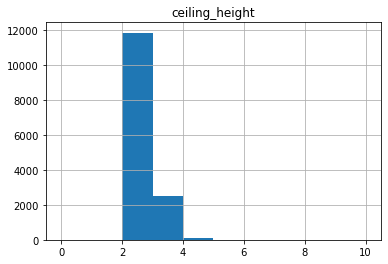

In [28]:
df.hist('ceiling_height', bins=10, range=(0,10), grid=True)

In [29]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

У большинства объектов выборки высота потолков находится в интервале от 2 до 4 метров, 
очень мало значений в в промежутке от 4 до 6 метров

<AxesSubplot:>

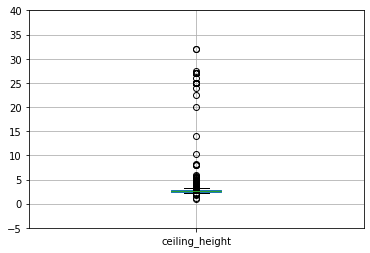

In [30]:
import matplotlib.pyplot as plt
plt.ylim(-5,40)

df.boxplot(column='ceiling_height', figsize=(6,12))

Высоту потолков больше 6 метров и меньше 2 можно считать выбросами, избавимся от этих значений

In [31]:
df[(df['ceiling_height']<2)|(df['ceiling_height']>6)]['ceiling_height'].value_counts().sort_index(ascending=True)

1.00      1
1.20      1
1.75      1
8.00      3
8.30      1
10.30     1
14.00     1
20.00     1
22.60     1
24.00     1
25.00     7
26.00     1
27.00     8
27.50     1
32.00     2
100.00    1
Name: ceiling_height, dtype: int64

Заменим значения с ошибкой ввода данных 27.00 на 2.7 и т.д., значения меньше 2 метров и больше 6 метров удалим из выборки.


In [32]:
df.loc[df['ceiling_height']>20, 'ceiling_height']= df.loc[df['ceiling_height']>20, 'ceiling_height']/10

In [33]:
df = df.query('(2 <= ceiling_height <= 6) |(ceiling_height.isna())').reset_index(drop=True)

In [34]:
df['ceiling_height'].describe()

count    14493.000000
mean         2.726674
std          0.278646
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

#### 2.4.2. Обработка аномальных значений в столбце **rooms**

<AxesSubplot:>

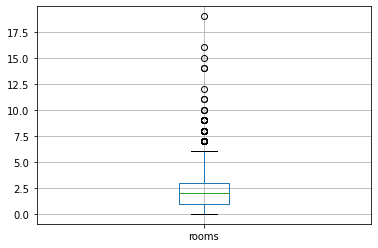

In [35]:
df.boxplot(column='rooms')

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

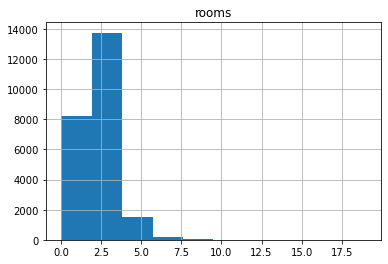

In [36]:
df.hist('rooms')

значения больше 7 (8-19 комнат) очень редки, их можно считать выбросами и удалить из выборки

In [37]:
df['rooms'].value_counts().sort_index()

0      197
1     8042
2     7936
3     5812
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [38]:
df = df[df['rooms']<8].reset_index(drop=True)

Отдельно рассмотрим выборку с квартирами с числом комнат равным 0

In [39]:
# данные, в которых количество комнат равно 0 и жилая площадь не заполнена можно убрать из выборки
# таких объявлений всего 14, возможно это не жилая недвижимость или пропуски возникли случайно,
# в любом случае эти объявления не подойдут для анализа
df.query('rooms==0 and living_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000,25.0,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
779,9,2600000,26.1,2018-02-20,0,NaN,18,NaN,8,False,...,NaN,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2406,4,1980000,27.0,2018-03-23,0,NaN,18,NaN,4,False,...,NaN,0,поселок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3144,7,2170000,31.0,2017-12-30,0,2.60,12,NaN,12,False,...,NaN,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3870,13,1700000,21.4,2015-02-11,0,2.70,3,NaN,2,False,...,NaN,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4895,5,2200000,24.0,2018-10-22,0,NaN,0,NaN,6,False,...,NaN,0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5181,5,3300000,25.4,2018-11-02,0,NaN,0,NaN,15,False,...,NaN,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5741,20,3590000,25.0,2017-08-30,0,2.80,35,NaN,26,False,...,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5949,1,3200000,30.3,2018-09-07,0,NaN,0,NaN,13,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
7809,11,3300000,27.3,2018-04-06,0,NaN,20,NaN,9,False,...,NaN,2,Санкт-Петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0


In [40]:
df = df.query('not(rooms==0 and living_area.isna())').reset_index(drop=True)

Посмотрим теперь на квартиры с нулевым числом комнат в разрезе категорий - студия это или нет

In [41]:
df.query('rooms==0').groupby('studio')['rooms'].count()

studio
False     55
True     128
Name: rooms, dtype: int64

In [42]:
df.groupby('studio')['rooms'].count()

studio
False    23504
True       139
Name: rooms, dtype: int64

В некоторых объявлениях для студий указана 1 комната, а в некторых 0. 
Поскольку студия является однокомнатной квартирой с жилой площадью равной площади комнаты, 
изменим для всех студий rooms = 1

In [43]:
df.loc[((df['rooms'] == 0)&(df['studio'] ==True)),'rooms'] = 1

Все остальные квартиры с нулевым числом комнат являются квартирами со свободной планировкой (open_plan). 
Эти данные оставим без изменений, так как нельзя с точностью сказать, сколько в них комнат.

#### 2.4.3. Обработка аномальных значений в столбце **total_area**

<AxesSubplot:>

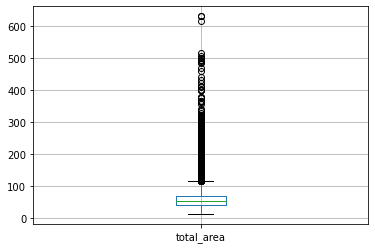

In [44]:
df.boxplot(column='total_area')

(0.0, 350.0)

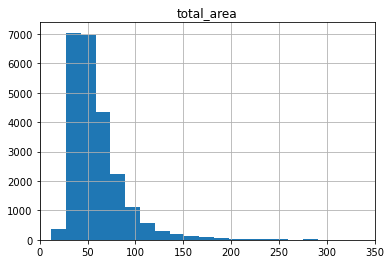

In [45]:
df.hist('total_area', bins=40)
plt.xlim(0, 350)

Выбросим значения больше 300 кв. метров, они очень редки

In [46]:
df= df.query('total_area<=300').reset_index(drop=True)

#### 2.4.4. Обработка аномальных значений в столбце **living_area**

<AxesSubplot:>

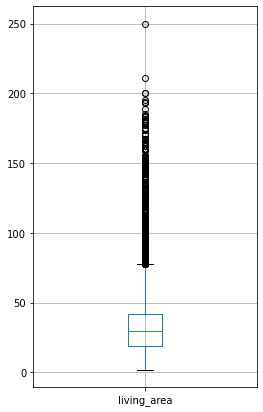

In [47]:
df.boxplot(column='living_area', figsize =(4,7), grid=True)

(0.0, 250.0)

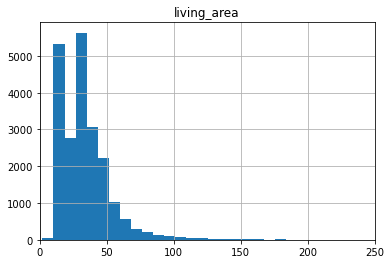

In [48]:
df.hist('living_area', bins=30)
plt.xlim(0, 250)

Значения жилой площади более 250 и менее 9 кв. м. единичны. Также уберем их из выборки

In [49]:
df = df.query('living_area<=250 and living_area>=9').reset_index(drop=True)

### 2.5. Обработка пропусков (продолжение)

После того, как мы очистили выборку от аномалий, вернемся к обработке пропусков в столбцах, 
где содержатся данные, занесенные пользователем

In [50]:
df.shape[0]

21705

После всех преобразований и удаления артефактов потеря составила около 8% данных от первоначальной выборки. Поскольку выборка достаточно большая, будем считать это необходимой потерей для корректных результатов исследования.

In [51]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8064
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              804
balcony                     0
locality_name               0
airports_nearest         4911
cityCenters_nearest      4892
parks_around3000         4891
parks_nearest           14264
ponds_around3000         4891
ponds_nearest           13343
days_exposition          2969
dtype: int64

Заменим пропущенную высоту потолков на медианную величину по всей выборке.

In [52]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Заменим пропуски в данных о площади кухни. 


In [53]:
#Логично преположить, что площадь кухни коррелирует с общей площадью, найдем корреляцию.

df['kitchen_area'].corr(df['total_area'])

0.5914463703842114

In [54]:
#Корреляция средняя по величине и положительная
#Подсчитаем соотношение площади кухонь к общей площади, найдем медианное значение показателя
ratio = (df['kitchen_area']/df['total_area']).median()
ratio

0.17213114754098363

In [55]:
#Заполним пропуски на рассчетное значение (ratio*total_area)

df.loc[df['kitchen_area'].isna(),'kitchen_area'] = ratio* df.loc[df['kitchen_area'].isna(),'total_area']

Попробуем обработать пропуски в столбце days_exposition, содержащем данные о том,
сколько дней было размещено объявление (от публикации до снятия).

Рассмотрим распределение пропусков по годам.

In [56]:
#посмотрим распределение всех данных по годам
df.groupby(df['first_day_exposition'].dt.year)['last_price'].count()

first_day_exposition
2014     130
2015    1114
2016    2655
2017    7623
2018    7503
2019    2680
Name: last_price, dtype: int64

In [57]:
#посмотрим распределение пропусков в days_exposition по годам
df.query('days_exposition.isna()').groupby(df['first_day_exposition'].dt.year)['last_price'].count()

first_day_exposition
2014      18
2015      65
2016      65
2017     250
2018     898
2019    1673
Name: last_price, dtype: int64

<AxesSubplot:title={'center':'Распределение пропусков данных days exposition'}, xlabel='first_day_exposition'>

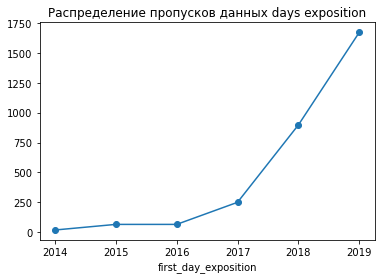

In [58]:
df.query('days_exposition.isna()').groupby(df['first_day_exposition'].dt.year)['last_price']\
                                  .count().plot(title= 'Распределение пропусков данных days exposition', style='o-')

Более половины всех пропущенных данных приходятся на 2019 год, резкий скачок пропусков наблюдается с 2017 года. 
Вероятно, в данном случае причина пропусков - технический сбой (сбой при выгрузке данных или их переносе, либо сбой при автоподсчете дней в системе).
Такие пропуски оставим незаполненными, однако будем учитывать что для выборки 2019 года анализ данных о скорости продаж не является в полной мере валидным, так как более 62% данных имеют пропуски в рассматриваемом параметре.

In [59]:
#все пропуски, кроме картографических данных и days_exposition, заполнены
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4911
cityCenters_nearest      4892
parks_around3000         4891
parks_nearest           14264
ponds_around3000         4891
ponds_nearest           13343
days_exposition          2969
dtype: int64

<div class="alert alert-info">
    
 Выявлены пропуски в данных,  указаны возможные причины их появления. 

 Пропуски заполнены логически предполагаемыми данными, идентификаторами пропуска (типа "unknown" и 0), медианными значениями выборке.
 Пропуски в картографических данных оставлены в выборке, поскольку иx заполнение может сильно исказить результаты исследования.
    
 Преобразованы типы данных для переменных без пропусков, где это возможно.
    
 В названиях местоположений объектов обнаружены неявные дубликаты, возникшие из-за различного написания. Обнаружены и обработаны 59 названий-дубликатов, наименования местоположений приведены к единому виду.
    
 Изучены данные основных количественных переменных, заполненных пользователем. Выборка очищена от выбросов.
На этапе предобработки выборка очищена от 8% данных.


</div>

## 3. Добавление новых столбцов

Добавим столбец с ценой квадратного метра - sqm_price

In [60]:
df['sqm_price'] = df['last_price']/df['total_area']

Добавим столбцы:

 - weekday_exposition - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
 - month_exposition - месяц публикации объявления
 - year_exposition - год публикации объявления

In [61]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [62]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [63]:
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавим столбец city_сenter_km - расстояние до центра города в километрах (округлим до ближайшего целого значения)

In [64]:
df['city_сenter_km'] = (df['cityCenters_nearest']/1000).round()

In [65]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,city_сenter_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0
4,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,NaN


Добавим столбец floor_type cо значениями категорий («первый», «последний», «другой»)

In [66]:
# функция возвращает тип этажа "первый", если floor=1
# 'последний', если этаж и общее количество этажей совпадают floor = total_floors
# 'другой', если этаж не первый и этаж не совпадает с общим количеством этажей в доме
# 'не определено' для тех квартир, в которых пропущено общее количество этажей

def type(df):
    floor = df['floor']
    floors_total = df['floors_total']
    if floor ==1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    if floors_total==0:
        return 'не определено'
    return 'другой'

df['floor_type'] = df.apply(type, axis=1)

In [67]:
df['floor_type'].value_counts()

другой           15945
последний         3054
первый            2654
не определено       52
Name: floor_type, dtype: int64

<div class="alert alert-info">
В выборку добавлены новые столбцы, которые позволят проанализировать дополнительные факторы, влияющие на цену недвижимости.

</div>

## 4. Исследовательский анализ данных

### 4.1. Изучим данные об общей площади (total_area)

(0.0, 350.0)

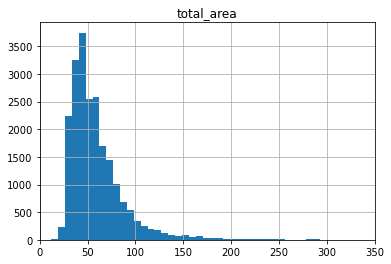

In [68]:
df.hist('total_area', bins=40)
plt.xlim(0, 350)

In [69]:
df['total_area'].describe()

count    21705.000000
mean        59.201079
std         29.911496
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        300.000000
Name: total_area, dtype: float64

Распределение смещенное вправо, имеет несколько пиков. Большинство квартир имеют площадь от 25 до 100 кв. метров. Характерный пик около 50 кв.м. Очень мало объектов с площадью менее 20 и более 150 кв.м.

### 4.2. Изучим данные о жилой площади (living_area)

(0.0, 200.0)

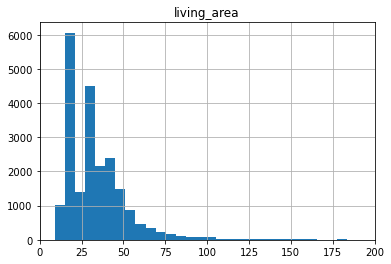

In [70]:
df.hist('living_area', bins=40)
plt.xlim(0, 200)

In [71]:
df['living_area'].describe()

count    21705.000000
mean        33.951668
std         19.505753
min          9.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64

Распределение, смещенное вправо. Распределение имеет несколько пиков. Самый высокий из них около 20 кв.м., второй пик примерно соответствует медианному значению в 30 кв.м. 
Мало квартир с жилой площадью более 75 кв.метров. В выборке большую часть занимают 1 и 2комнатные квартиры с жилой площадью от 15 до 50 кв.м.

### 4.3. Изучим данные о площади кухни (kitchen_area)

(0.0, 75.0)

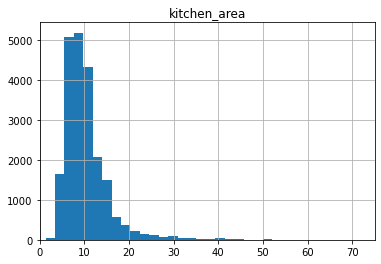

In [72]:
df.hist('kitchen_area', bins=50)
plt.xlim(0, 75)

In [73]:
df['kitchen_area'].describe()

count    21705.000000
mean        10.357120
std          5.610438
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

Распределение величины является смещенным вправо. Среднее значение распределения площадей кухни по выборке близко к медианному и составляет 10.4 кв.м. 
Пик распределения приходится примерно на 9.5 кв.м. Мало квартир с площадью кухни менее 3 и более 30 кв.м.

### 4.4. Изучим данные о цене объекта (last_price)

(1000000.0, 40000000.0)

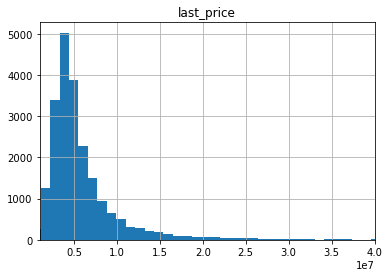

In [74]:
df.hist('last_price', bins=300)
plt.xlim(1000000, 40000000)

In [75]:
df['last_price'].describe()

count    2.170500e+04
mean     6.270530e+06
std      7.696401e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Распреление Пуассона (величина является дискретной). Стоимость большей части квартир выборки находится в диапазоне от 1,5 до 8 млн., 
самый высокий пик распределения находится на отметке около 4,5 млн. Распределение имеет ступенчатый вид, 
характеризуется резкими скачками цены объектов.

### 4.5. Изучим данные о количестве комнат (rooms)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

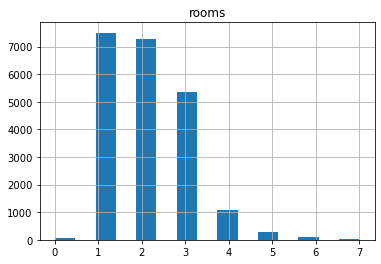

In [76]:
df.hist('rooms', bins=15)

In [77]:
df['rooms'].describe()

count    21705.000000
mean         2.061138
std          1.014452
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Распределение Пуассона. Большую часть выборки занимают 1, 2 и 3хкомнатные квартиры. Мало квартир с 5-7 комнатами 
и с 0 комнатами (квартиры свободной планировки, судя по их жилой площади это чаще всего "переделанные" 1комнатные квартиры )

### 4.6. Изучим данные о высоте потолков (ceiling_height)

(1.0, 6.0)

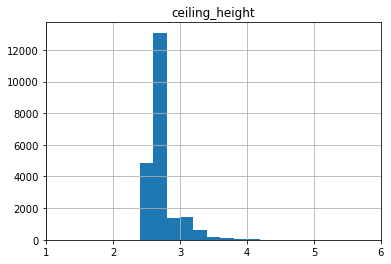

In [78]:
df.hist('ceiling_height', bins=20)
plt.xlim(1,6)

In [79]:
df['ceiling_height'].describe()

count    21705.000000
mean         2.696164
std          0.218497
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Распределение Пуассона. Средняя высота потолков близка к медианной и составляет 2,7 м. Есть несколько пиков на распределении: 
примерно на 2,5 м., затем самый высокий на 2.7 м и еще один значимый высокий пик чуть больше 3 метров. 
При этом очень мало объектов с высотой потолков ниже 2.5 и выше 4 метров.

### 4.7. Изучим данные об этаже (floor)

(1.0, 33.0)

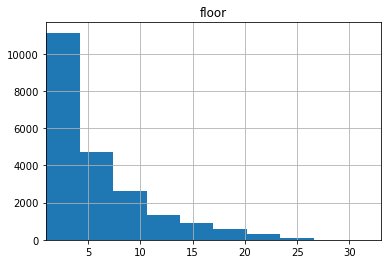

In [80]:
df.hist('floor', bins=10)
plt.xlim(1,33)

In [81]:
df['floor'].describe()

count    21705.000000
mean         5.890993
std          4.868091
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Рапределение Пуассона. Большая часть квартир располагается на этажах с 1 по 4ый, распределение имеет характерный "ступенчатый" вид: 
чем выше номер этажа, тем меньше квартир продается. Очень малая часть выборки имеет этаж выше 27.

### 4.8. Изучим данные о типе этажа (floor_type)

<AxesSubplot:>

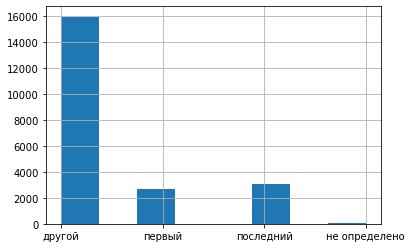

In [82]:
df['floor_type'].hist(bins=8)

In [83]:
df['floor_type'].value_counts()

другой           15945
последний         3054
первый            2654
не определено       52
Name: floor_type, dtype: int64

Распределение Пуассона. Количество квартир, расположенных на первом и последнем этажах составляет большую часть выборки - 12% и 14% соответственно. 
Остальные квартиры расположены на других этажах 
(либо нельзя с уверенностью сказать, последний ли это этаж, так как в доме не указана этажность)

### 4.9. Изучим данные об общем количестве этажей (floors_total)

(0.0, 40.0)

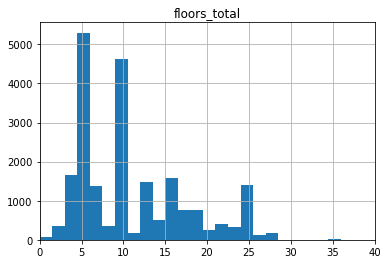

In [84]:
df.hist('floors_total', bins=40)
plt.xlim(0,40)

In [85]:
df['floors_total'].describe()

count    21705.000000
mean        10.631237
std          6.580901
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Распределение Пуассона.Распределение имеет несколько пиков: больше всего 4-5этажных домов, чуть меньше 9-10этажек, 
также есть пик на 12этажках, на  16-17 этажах и последний значимый пик на 25этажных домах. 
Очень мало квартир располагаются в домах выше 30 этажей.

### 4.10. Изучим данные о расстоянии до центра города в метрах (cityCenters_nearest)

In [86]:
df['cityCenters_nearest'].isna().sum()

4892

In [87]:
df.loc[(df['locality_name']=="Санкт-Петербург"),'cityCenters_nearest'].isna().sum()

44

(0.0, 60000.0)

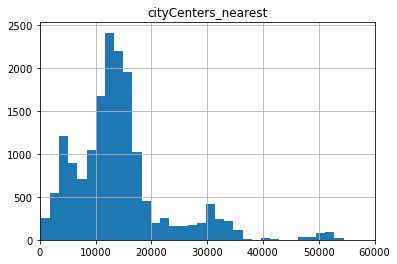

In [88]:
df.hist('cityCenters_nearest', bins=40)
plt.xlim(0,60000)

In [89]:
df['cityCenters_nearest'].describe()

count    16813.000000
mean     14263.594302
std       8663.252677
min        181.000000
25%       9365.000000
50%      13138.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Большая часть объектов находится на расстоянии от 5 до 20 км от центра города, пик распределения на 13-14 км. 
В выборке много пропусков, данные характеризуют по большей части объекты, которые находятся в городе Санкт-Петербург.

### 4.11. Изучим данные о расстоянии до ближайшего аэропорта в метрах (airports_nearest)

In [90]:
df['airports_nearest'].isna().sum()

4911

In [91]:
df.loc[(df['locality_name']=="Санкт-Петербург"),'airports_nearest'].isna().sum()

64

(0.0, 80000.0)

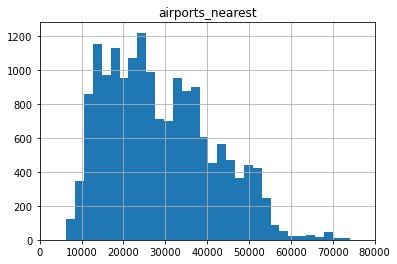

In [92]:
df.hist('airports_nearest', bins=40)
plt.xlim(0,80000)

In [93]:
df['airports_nearest'].describe()

count    16794.000000
mean     28783.456353
std      12667.489031
min          0.000000
25%      18522.000000
50%      26710.000000
75%      37271.750000
max      84869.000000
Name: airports_nearest, dtype: float64

Распределение смещено вправо, имеет много пиков, данные по объектам очень варьируют, высокое стандартное отклонение. 
Большая часть объектов находится на расстоянии от 11 до 40 км от аэропорта, пик распределения на 26 км. 
В выборке много пропусков, данные характеризуют по большей части объекты, которые находятся в городе Санкт-Петербург.

### 4.12. Изучим данные о расстоянии до ближайшего парка в метрах (parks_nearest)

In [94]:
df['parks_nearest'].isna().sum()

14264

In [95]:
df.loc[(df['locality_name']=="Санкт-Петербург"),'parks_nearest'].isna().sum()

7807

(0.0, 3000.0)

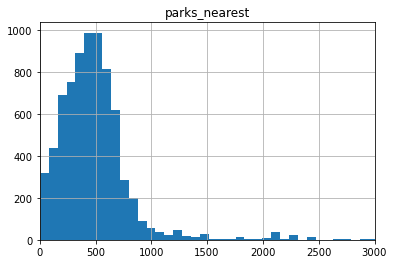

In [96]:
df.hist('parks_nearest', bins=40)
plt.xlim(0,3000)

In [97]:
df['parks_nearest'].describe()

count    7441.000000
mean      488.086682
std       338.070104
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [98]:
df['parks_nearest'].mode()

0    441.0
Name: parks_nearest, dtype: float64

Распределение, смещенное вправо. Для более чем половины объектов данные о расстоянии до ближайшего парка отсутствуют 
(половина пропусков приходится на Спб, половина на пригороды).
Для большинства оставшихся объектов ближайший парк находится на расстоянии 450-600 м.
Мало квартир, для которых парк находится дальше 1.5 км.

### 4.13. Изучим данные о дне (weekday_exposition) и месяце публикации объявления (month_exposition)

(0.0, 6.0)

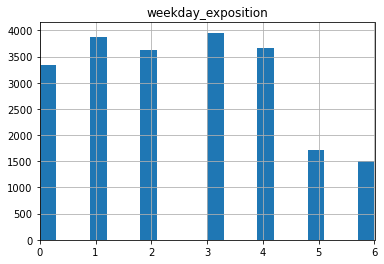

In [99]:
df.hist('weekday_exposition', bins=20)
plt.xlim(0,6)

In [100]:
df['weekday_exposition'].value_counts().sort_index()

0    3339
1    3879
2    3625
3    3955
4    3672
5    1721
6    1514
Name: weekday_exposition, dtype: int64

Распределение Пуассона. Почти с одинаковой частотой объявления публиковали по будним дням, и в 2.5 раза реже по выходным.
Чаще всего объявления размещались в четверг.

(1.0, 12.0)

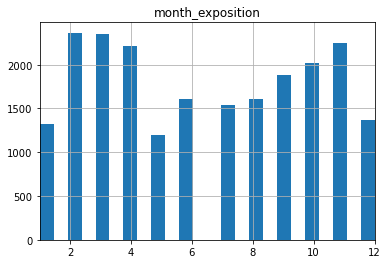

In [101]:
df.hist('month_exposition', bins=24)
plt.xlim(1,12)

In [102]:
df['month_exposition'].value_counts().sort_index()

1     1319
2     2365
3     2352
4     2210
5     1193
6     1611
7     1536
8     1607
9     1880
10    2015
11    2249
12    1368
Name: month_exposition, dtype: int64

Распределение Пуассона.
Чаще всего объявления размещались с февраля по апрель и с сентября по ноябрь. 
Меньше публикаций в мае, в летние месяцы и в декабре, январе.

### 4.14. Изучим сколько дней были размещены объявления (от публикации до снятия)  - столбец days_exposition

In [103]:
df['days_exposition'].isna().sum()

2969

(0.0, 1000.0)

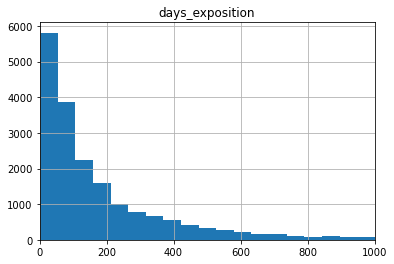

In [104]:
df.hist('days_exposition', bins=30)
plt.xlim(0,1000)

(0.0, 100.0)

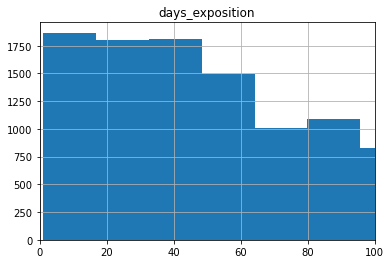

In [105]:
#Посмотрим на распределение величины на малых величинах
df.hist('days_exposition', bins=100)
plt.xlim(0,100)

<AxesSubplot:>

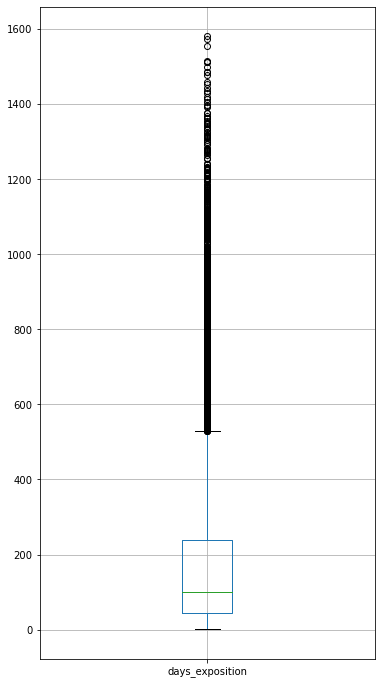

In [106]:
df.boxplot('days_exposition', figsize=(6,12))

In [107]:
df['days_exposition'].describe()

count    18736.000000
mean       184.547075
std        220.788850
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

Распределение Пуассона.
Судя по распределению быстрыми можно считать продажи в течение 44 дней,
а все продажи дольше 430 дней можно считать необычно долгими.

В среднем объявление было активно 184 дня (однако на среднее значение сильно влияют длительные продажи), 
в данном случае лучше выборку характеризует медиана - 101 день (или 3 месяца), половина квартир была продана за это время.

<div class="alert alert-info">
В ходе исследовательского анализа данных изучены переменные и выявлены следующие закономерности:
    
- большинство квартир имеют общую площадь в интервале 25-100 кв.м., при этом 48 кв.м. самая часто встречающаяся площадь.
    
- большую часть выборки занимают 1 и 2хкомнатные квартиры с жилой площадью до 50 кв.м.
    
- средняя площадь кухни около 10 кв.м., при этом объектов с кухней менее 3 кв.м. и более 30 кв.м. очень мало
    
- цены квартир сильно варьируют, большинство объектов стоят менее 8 млн.
    
- выборка содержит мало объектов с числом комнат от 5 до 7, в основном это 1-3комнатные квартиры.
    
- высота потолков чаще всего 2.5 - 2.7 м
    
- чаще всего квартиры расположены с 1 по 4 этаж, чуть реже с 5 по 10. 
    
- на первом и последнем этажах расположены 12% и 14% квартир соответственно
    
- чаще всего продают квартиры в 4-5этажных домах, чуть меньше в -10этажках.
    
- большинство квартир к продаже в Санкт-Петербурге расположены на расстоянии 10-15 км от центра города
    
- удаленность объектов от аэропорта в Санкт-Петербурге чаще всего от 11 до 40 км
    
- для половины выборки можем оценить расстояние до ближайшего парка, обычно оно не более 600 м.
    
- объявления о продаже квартир в 2,5 чаще размещают по будним дням
    
- реже продают квартиры летом и в декабре-январе, пик подачи объявлений о продаже приходится на февраль и ноябрь
    
- продажи в  течение 44 дней со дня подачи объявления,можно считать быстрыми, а продажи более чем за 430 дней со дня подачи - аномально долгими

</div>

## 5. Какие факторы больше всего влияют на общую (полную) стоимость объекта

Изучим зависимость цены квартиры от:

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

корреляция last price и total_area 0.6742252023248265
корреляция last price и living_area 0.5860518651959901
корреляция last price и kitchen_area 0.5204087591036116


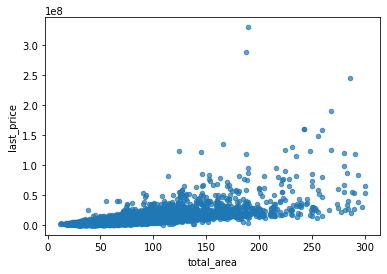

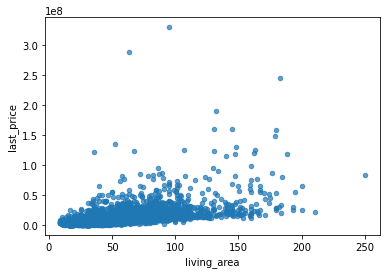

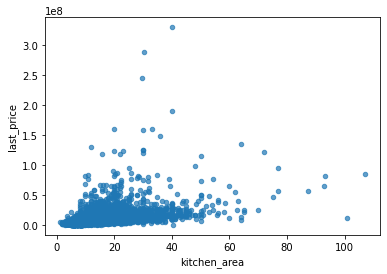

In [108]:
# подсчитаем корреляцию площадей квартиры и ее цены, построим диаграммы размаха
list = ['total_area', 'living_area', 'kitchen_area']

for elem in list:
    df.plot(y='last_price', x=elem, kind='scatter', alpha=0.7) 
    co = df['last_price'].corr(df[elem])
    print('корреляция last price и',elem, co)
   

Коэффициенты корреляции говорят о наличии средней положительной взаимозависимости величин. 
Наибольшая взаимосвязь цены квартиры и ее общей площади, 
в меньшей степени наблюдаем взаимосвязь цены и жилой площади, цены и площади кухни.

Судя по диаграммам рассеяния для больших величин площадей разброс цены гораздо больше, чем для малых и средних.
вероятно, цена больших по площади квартир (более 200 кв.м. общей площади, более 150 кв.м. жилой площади) 
зависит от не только напрямую от площадей, для них усиливается влияние ряда других факторов.

In [109]:
#рассчитаем коррелияцию количества комнат, типа этажа, дня, месяца и года подачи объявления
list2 = ['rooms', 'floor_type', 'weekday_exposition', 'month_exposition', 'year_exposition']

for elem2 in list2:
    try:
        co = df['last_price'].corr(df[elem2])
        print('корреляция last price и',elem2, co)
    except:
        print('Невозможно подсчитать')   

корреляция last price и rooms 0.3917926344091006
Невозможно подсчитать
корреляция last price и weekday_exposition -0.009102879243193035
корреляция last price и month_exposition -0.00430487632345991
корреляция last price и year_exposition -0.04308645168223398


Наблюдается слабая корреляция между ценой квартиры и числом комнат. 
Между временными данными и ценой квартиры практически нет взаимосвязи.

In [110]:
#построим сводные таблицы для каждого фактора, исследуя медианные значения групп
# визуализируем данные при помощи столбчатых диаграмм
pivot_rooms = df.pivot_table(index ='rooms', values='last_price', aggfunc ='median')
pivot_rooms

,last_price
rooms,
0,2600000
1,3590000
2,4800000
3,6200000
4,9000000
5,13800000
6,17900000
7,22160000


<AxesSubplot:xlabel='rooms'>

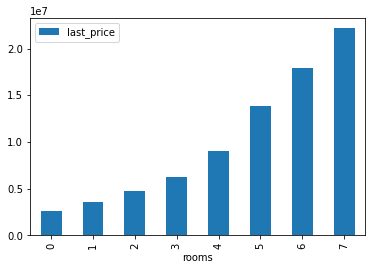

In [111]:
pivot_rooms.plot(y='last_price', kind='bar')

На графике для медианных значений цены по квартирам с различным числом комнат видна зависимость:
рост числа комнат сопровождается ростом цены объекта. Корреляция же показывает слабую положительную взаимосвязь. 
Вероятно, сказывается также влияние других факторов (например, площади комнат, тип планировки и т.д.)

In [112]:
pivot_floor_type = df.pivot_table(index ='floor_type', values='last_price', aggfunc ='median')
pivot_floor_type

,last_price
floor_type,
другой,4838050
не определено,5315235
первый,3920000
последний,4300000


<AxesSubplot:ylabel='floor_type'>

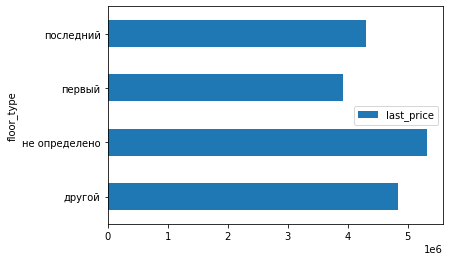

In [113]:
pivot_floor_type.plot(y='last_price', kind='barh')

Квартиры на первом и последнем этаже обычно стоили дешевле остальных квартир. 

Квартиры, для которых не указан этаж (тип "не определено", 
это не первый этаж, но нельзя с уверенностью сказать, что не последний) были дороже остальных, 
однако выборка данных для них мала, результат можно не учитывать.

Дороже остальных были квартиры с типом этажа "другой" (не первый и не последний).

In [114]:
pivot_weekday_exposition = df.pivot_table(index ='weekday_exposition', values='last_price', aggfunc ='median')
pivot_weekday_exposition

,last_price
weekday_exposition,
0,4650000
1,4700000
2,4700000
3,4650000
4,4577500
5,4550000
6,4550000


<AxesSubplot:xlabel='weekday_exposition'>

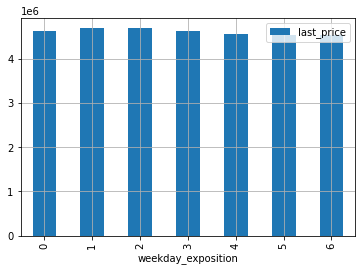

In [115]:
pivot_weekday_exposition.plot(y='last_price', kind='bar', grid=True)

Взаимосвязи между ценой объекта и днем недели, когда было размещено объявление не обнаружено. 

In [116]:
pivot_month_exposition = df.pivot_table(index ='month_exposition', values='last_price', aggfunc ='median')
pivot_month_exposition

,last_price
month_exposition,
1,4650000
2,4670000
3,4690000
4,4800000
5,4500000
6,4400000
7,4600000
8,4550000
9,4690000


<AxesSubplot:xlabel='month_exposition'>

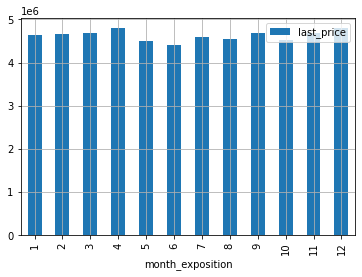

In [117]:
pivot_month_exposition.plot(y='last_price', kind='bar', grid=True)

Взаимосвязи между ценой объекта и месяцем, когда было размещено объявление, не обнаружено. 
Есть небольшая просадка по цене в мае и в летние месяцы.

In [118]:
pivot_year_exposition = df.pivot_table(index ='year_exposition', values='last_price', aggfunc ='median')
pivot_year_exposition

,last_price
year_exposition,
2014,7540000
2015,5285000
2016,4500000
2017,4500000
2018,4600000
2019,5042500


<AxesSubplot:xlabel='year_exposition'>

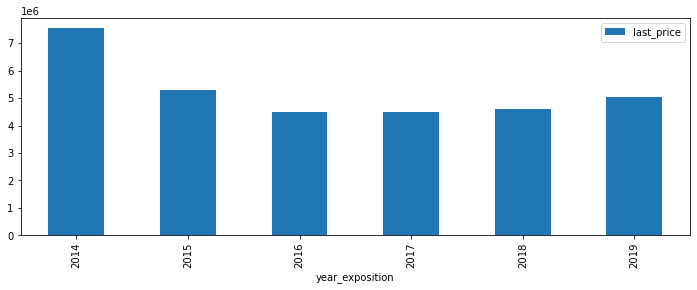

In [119]:
pivot_year_exposition.plot(y='last_price', kind='bar', figsize=(12,4))

проверим, с чем связан пик цены в 2014 году. Сгруппируем данные по количеству комнат дополнительно.

In [120]:
pivot_year_rooms_exposition = df.pivot_table(index =['year_exposition', 'rooms'], values='last_price', aggfunc ='median')
pivot_year_rooms_exposition 

last_price
year_exposition rooms            
2014            1         4410825
                2         7100000
                3         9890000
                4        17000000
                5        17875000
                6        79339000
2015            1         3600000
                2         4980000
                3         6300000
                4        10150000
                5        15000000
                6        19000000
                7        24900000
2016            0         2200000
                1         3500000
                2         4490000
                3         5950000
                4         9700000
                5        10850000
                6        12500000
                7        25000000
2017            0         2575000
                1         3500000
                2         4600000
                3         6200000
                4         9000000
                5        12800000
                6        16825000
                7        18750000
2018            0         2990000
                1         3599000
                2         4850000
                3         6065000
                4         8400000
                5        13650000
                6        18250000
                7        26000000
2019            1         3895000
                2         5200000
                3         6500000
                4         9000000
                5        15000000
                6        18450000
                7        17025000

<AxesSubplot:xlabel='year_exposition,rooms'>

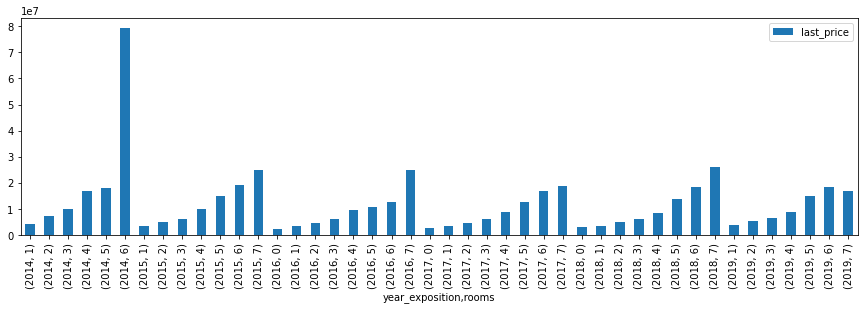

In [121]:
pivot_year_rooms_exposition.plot(y='last_price', kind='bar', figsize=(15,4))

In [122]:
df.query('rooms==6 and year_exposition==2014')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,city_сenter_km,floor_type
10612,9,79339000,218.0,2014-12-11,6,2.65,6,123.27,6,False,...,NaN,1.0,323.0,760.0,363940.366972,3,12,2014,2.0,последний


<AxesSubplot:xlabel='year_exposition'>

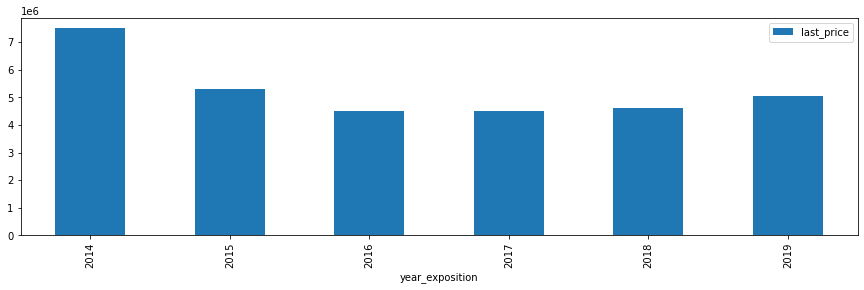

In [123]:
#На данные 2014 года сильно повлияла одна квартира с 6 комнатами и высокой ценой. Построим график без учета.
df1 = df.query('not(rooms==6 and year_exposition==2014)')
df1.pivot_table(index =['year_exposition'], values='last_price', aggfunc ='median').plot(y='last_price', kind='bar', figsize=(15,4))

Рынок "просел" по цене квартир сильнее всего в 2016-2018 годах, потом снова начал расти к уровню 2014-2015 годов.
Связь цены объекта и года подачи объявления очень слабая, судя по коэфиициенту корреляции. Можно предположить, что большее влияние имеют другие факторы (например, внешние факторы, влиящие на стабильность рынка в целом, а также количество объектов недвижимости в продаже на рынке и т.д.).

<div class="alert alert-info">
Изучена зависимость цены квартиры от ряда факторов. Выявлены следующие закономерности:
    
- есть средняя положительная корреляция между ценой объектов и общей, жилой площадью, площадью кухни
    
- для больших по площади квартир разброс цен гораздо больше, чем для остальных. Для данных объектов усиливается влияние других факторов, кроме площади
    
- наблюдается слабая положительная взаимосвязь между ценой квартиры и числом комнат
    
- между днем, месяцем, годом подачи объявления и ценой объекта корреляции практически нет
    
- незначительное снижение цен на квартиры можно наблюдать в мае-августе
    
- динамика рынка недвижимости по годам нестабильная, наблюдаем рост в 2014 году, падение в 2016-2018 г., рост в 2019 г., сказывается влияние внешних факторов
    
- квартиры на первом и последнем этажах стоили дешевле остальных, однако силу взаимосвязи величин оценить не предоставляется возможным

</div>

## 6. Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [124]:
pivot_locality = df.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'mean'])
pivot_locality.columns = ['number', 'mean_sqm_price']
pivot_locality.sort_values(by='number', ascending =False).head(10)


,number,mean_sqm_price
locality_name,,
Санкт-Петербург,14499,113682.776393
Мурино,523,86636.724517
Кудрово,424,95716.021094
поселок Шушары,403,78915.130175
Всеволожск,371,68880.131023
Пушкин,343,103435.633271
Колпино,327,75249.775385
поселок Парголово,301,90442.587023
Гатчина,292,68627.363919


In [125]:
min = pivot_locality['mean_sqm_price'].min()
max = pivot_locality['mean_sqm_price'].max()
pivot_locality[pivot_locality['mean_sqm_price']==min]

,number,mean_sqm_price
locality_name,,
деревня Старополье,1,10368.663594


In [126]:
pivot_locality[pivot_locality['mean_sqm_price']==max]

,number,mean_sqm_price
locality_name,,
поселок Репино,2,127678.571429


<div class="alert alert-info">
Больше всего объявлений по продаже квартир в Санкт-Петербурге, цена одного квадратного метра в среднем 113679.
Также достаточно много продается квартир в ближайщих пригородах. Цена одного кв. метра варьирует от 68 тыс. до 103 тыс.
    
    
    
Самая низкая стоимость квадратного метра по выборке зафиксирована в деревне Ставрополье, она составила 10368.
Самая высокая стоимость квадратного метра - в поселке Репино, она составила 127678.    
</div>

## 7. Расчет средней стоимости километра для расстояния от центра города для квартир Санкт-Петербурга. 

In [127]:
df1 = df.query('locality_name=="Санкт-Петербург" and city_сenter_km!=0')
df1.shape[0]

14475

In [128]:
(df1['sqm_price']/df1['city_сenter_km']).mean()

15512.731841492317

In [129]:
df1['sqm_price'].corr(df1['city_сenter_km'])

-0.31710089103081596

<AxesSubplot:xlabel='city_сenter_km', ylabel='sqm_price'>

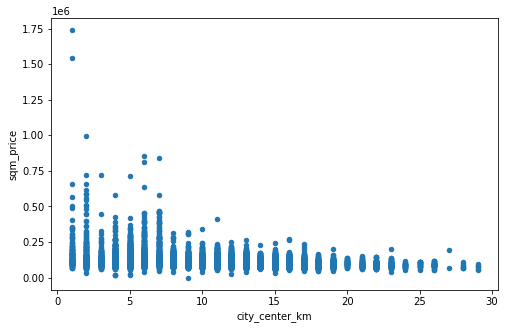

In [130]:
df1.plot(x='city_сenter_km', y='sqm_price', kind='scatter', figsize=(8,5))

<div class="alert alert-info">
Для квартир в Санкт-Петербурге (для которых есть данные об удаленности от центра города - это выборка в 14476 квартир) 
средняя стоимость одного км удаленности от центра города составляет 15511. 

Корреляция слабо отрицательная, 
то есть с увеличением удаленности от центра снижается стоимость квадратного метра квартиры. 

На диаграмме рассеяния мы видим характерный нисходящий тренд стоимости с увеличением расстояния. 
Есть выбросы по цене для квартир, находящихся близко от центра.

Судя по корреляции есть ряд других факторов, также влияющих на стоимость квадратного метра квартиры.

</div>


## Общий вывод

<div class="alert alert-info">
<b> Проведен исследовательский анализ данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за 6 лет. 
Выявлен ряд закономерностей, которые можно учитывать для определения рыночной стоимости объекта недвижимости для выявления мошенничества и аномалий:</b>

    - есть ряд аномалий в параметрах квартир, указанных пользователем, их необходимо учесть и верифицировать
    - картографические данные как правило можно проанализировать для квартир в Санкт-Петербурге и сложно анализировать 
    для регионов
    - можно отследить аномально долгие продажи и проверить такие объекты
    - наибольшая взаимосвязь наблюдается между ценой и площадями (общей,жилой, площадью кухни), но для больших 
    величин взаимосвязь слабеет
    - временные данные слабо взаимосвязаны с ценой квартиры, но можно отслеживать динамику количества объявлений на 
    рынке по дням недели и месяцам
    - можно оценить среднюю стоимость квадратного метра квартир по местоположению и использовать ее как ориентир 
    для сравнения при выявлении мошенничества и аномалий
    -нужно учитывать сразу совокупность факторов при анализе цены объекта недвижимости
</div>